## 103 - Config Files and configparser


[Youtube](https://www.youtube.com/watch?v=nX7JIqRc5H0)

In [1]:
import configparser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({'pressure': np.random.random((100)) + 1012, 'temperature': np.random.random((100)) + 19, 'humidity': np.random.random((100)) + 26, 'solar_radiation': np.random.random((100)) + 1000})

In [3]:
df.head()

,pressure,temperature,humidity,solar_radiation
0,1012.621008,19.459878,26.650964,1000.911015
1,1012.993674,19.986178,26.202312,1000.789485
2,1012.761065,19.436551,26.508422,1000.850049
3,1012.774832,19.793533,26.358241,1000.734764
4,1012.989610,19.749402,26.455993,1000.848017


In [4]:
config = configparser.ConfigParser()
config.read('MM103_plot_config.ini')

['MM103_plot_config.ini']

In [5]:
config.sections()

['pressure', 'temperature', 'humidity']

In [6]:
n_fields = len(df.columns)

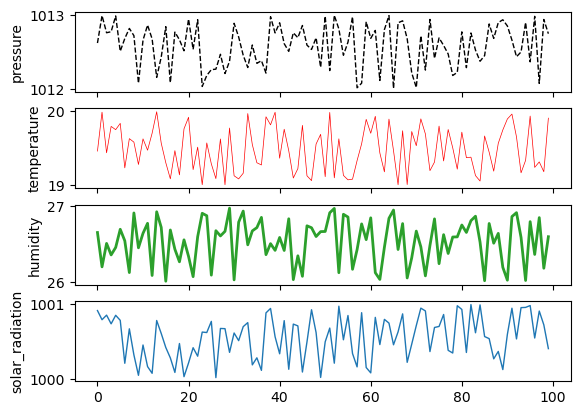

In [7]:
fig, axes = plt.subplots(nrows = n_fields, sharex = True)

for i, field in enumerate(df.columns):
	settings = dict(config['DEFAULT'])
	if field in config.sections():
		settings.update(dict(config[field]))
		
	color = settings.get('color')
	linestyle = settings.get('linestyle')
	linewidth = settings.get('linewidth')

	axes[i].plot(df[field], color = color, linewidth = linewidth, linestyle = linestyle)
	axes[i].set_ylabel(field)